In [1]:
import os
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

from gaminet import GAMINet
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import global_visualize_wo_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_regularization
from gaminet.utils import plot_trajectory

In [2]:
def load_ch(path="./", missing_strategy="drop"):
    
    from sklearn.datasets import fetch_california_housing
    cal_housing = fetch_california_housing()
    x, y = cal_housing.data, cal_housing.target.reshape(-1, 1)

    task_type = "Regression"
    meta_info = {"X" + str(i + 1):{'type':'continuous'} for i in range(x.shape[1])}
    meta_info.update({'Y':{'type':'target'}})         
    return x, y, task_type, meta_info

def load_classification_data(name):
    data_path = '.'
    func_dict = {'ch':load_ch}
    def wrapper(random_state):
        function_name_ = func_dict[name]
        x, y, task_type, meta_info = function_name_(data_path, missing_strategy="impute")
        xx = np.zeros((x.shape[0], x.shape[1]), dtype=np.float32)
        for i, (key, item) in enumerate(meta_info.items()):
            if item['type'] == 'target':
                sy = MinMaxScaler((0, 1))
                y = sy.fit_transform(y)
                meta_info[key]['scaler'] = sy
            elif item['type'] == 'categorical':
                enc = OrdinalEncoder()
                xx[:,[i]] = enc.fit_transform(x[:,[i]])
                meta_info[key]['values'] = []
                for item in enc.categories_[0].tolist():
                    try:
                        if item == int(item):
                            meta_info[key]['values'].append(str(int(item)))
                        else:
                            meta_info[key]['values'].append(str(item))
                    except ValueError:
                        meta_info[key]['values'].append(str(item))
            else:
                sx = MinMaxScaler((0, 1))
                xx[:,[i]] = sx.fit_transform(x[:,[i]])
                meta_info[key]['scaler'] = sx
        train_x, test_x, train_y, test_y = train_test_split(xx.astype(np.float32), y,
                                                            test_size=0.2, random_state=random_state)
        return train_x, test_x, train_y, test_y, task_type, meta_info
    return wrapper

In [3]:
def metric_wrapper(metric, scaler):
    def wrapper(label, pred):
        return metric(label, pred, scaler=scaler)
    return wrapper

def mse(label, pred, scaler=None):
    return mean_squared_error(label, pred)

get_metric = metric_wrapper(mse, None)

In [4]:
random_state = 0
data_loader = load_classification_data("ch")
train_x, test_x, train_y, test_y, task_type, meta_info = data_loader(random_state)

In [5]:
meta_info.keys()

dict_keys(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'])

####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.04731, val loss: 0.04731
Main effects training epoch: 2, train loss: 0.03397, val loss: 0.03365
Main effects training epoch: 3, train loss: 0.02865, val loss: 0.02878
Main effects training epoch: 4, train loss: 0.02540, val loss: 0.02586
Main effects training epoch: 5, train loss: 0.02387, val loss: 0.02450
Main effects training epoch: 6, train loss: 0.02321, val loss: 0.02387
Main effects training epoch: 7, train loss: 0.02280, val loss: 0.02344
Main effects training epoch: 8, train loss: 0.02249, val loss: 0.02312
Main effects training epoch: 9, train loss: 0.02225, val loss: 0.02285
Main effects training epoch: 10, train loss: 0.02202, val loss: 0.02259
Main effects training epoch: 11, train loss: 0.02182, val loss: 0.02236
Main effects training epoch: 12, train loss: 0.02163, val loss: 0.02216
Main effects training e

Main effects training epoch: 114, train loss: 0.01761, val loss: 0.01916
Main effects training epoch: 115, train loss: 0.01764, val loss: 0.01924
Main effects training epoch: 116, train loss: 0.01762, val loss: 0.01913
Main effects training epoch: 117, train loss: 0.01766, val loss: 0.01924
Main effects training epoch: 118, train loss: 0.01758, val loss: 0.01915
Main effects training epoch: 119, train loss: 0.01760, val loss: 0.01917
Main effects training epoch: 120, train loss: 0.01758, val loss: 0.01916
Main effects training epoch: 121, train loss: 0.01758, val loss: 0.01917
Main effects training epoch: 122, train loss: 0.01757, val loss: 0.01915
Main effects training epoch: 123, train loss: 0.01755, val loss: 0.01913
Main effects training epoch: 124, train loss: 0.01756, val loss: 0.01915
Main effects training epoch: 125, train loss: 0.01756, val loss: 0.01912
Main effects training epoch: 126, train loss: 0.01756, val loss: 0.01917
Main effects training epoch: 127, train loss: 0.017

Main effects training epoch: 227, train loss: 0.01747, val loss: 0.01895
Main effects training epoch: 228, train loss: 0.01733, val loss: 0.01877
Main effects training epoch: 229, train loss: 0.01729, val loss: 0.01873
Main effects training epoch: 230, train loss: 0.01731, val loss: 0.01877
Main effects training epoch: 231, train loss: 0.01729, val loss: 0.01872
Main effects training epoch: 232, train loss: 0.01742, val loss: 0.01893
Main effects training epoch: 233, train loss: 0.01728, val loss: 0.01875
Main effects training epoch: 234, train loss: 0.01728, val loss: 0.01877
Main effects training epoch: 235, train loss: 0.01728, val loss: 0.01876
Main effects training epoch: 236, train loss: 0.01733, val loss: 0.01882
Main effects training epoch: 237, train loss: 0.01745, val loss: 0.01893
Main effects training epoch: 238, train loss: 0.01728, val loss: 0.01877
Main effects training epoch: 239, train loss: 0.01727, val loss: 0.01876
Main effects training epoch: 240, train loss: 0.017

Interaction training epoch: 69, train loss: 0.01633, val loss: 0.01775
Interaction training epoch: 70, train loss: 0.01633, val loss: 0.01772
Interaction training epoch: 71, train loss: 0.01632, val loss: 0.01773
Interaction training epoch: 72, train loss: 0.01632, val loss: 0.01772
Interaction training epoch: 73, train loss: 0.01632, val loss: 0.01771
Interaction training epoch: 74, train loss: 0.01632, val loss: 0.01772
Interaction training epoch: 75, train loss: 0.01631, val loss: 0.01770
Interaction training epoch: 76, train loss: 0.01632, val loss: 0.01770
Interaction training epoch: 77, train loss: 0.01632, val loss: 0.01772
Interaction training epoch: 78, train loss: 0.01631, val loss: 0.01769
Interaction training epoch: 79, train loss: 0.01631, val loss: 0.01767
Interaction training epoch: 80, train loss: 0.01631, val loss: 0.01769
Interaction training epoch: 81, train loss: 0.01632, val loss: 0.01769
Interaction training epoch: 82, train loss: 0.01629, val loss: 0.01766
Intera

Interaction training epoch: 184, train loss: 0.01573, val loss: 0.01704
Interaction training epoch: 185, train loss: 0.01574, val loss: 0.01706
Interaction training epoch: 186, train loss: 0.01575, val loss: 0.01705
Interaction training epoch: 187, train loss: 0.01576, val loss: 0.01707
Interaction training epoch: 188, train loss: 0.01580, val loss: 0.01713
Interaction training epoch: 189, train loss: 0.01576, val loss: 0.01709
Interaction training epoch: 190, train loss: 0.01575, val loss: 0.01707
Interaction training epoch: 191, train loss: 0.01574, val loss: 0.01705
Interaction training epoch: 192, train loss: 0.01574, val loss: 0.01705
Interaction training epoch: 193, train loss: 0.01573, val loss: 0.01705
Interaction training epoch: 194, train loss: 0.01573, val loss: 0.01705
Interaction training epoch: 195, train loss: 0.01573, val loss: 0.01704
Interaction training epoch: 196, train loss: 0.01573, val loss: 0.01704
Interaction training epoch: 197, train loss: 0.01573, val loss: 

Fine tuning epoch: 76, train loss: 0.01515, val loss: 0.01649
Fine tuning epoch: 77, train loss: 0.01515, val loss: 0.01648
Fine tuning epoch: 78, train loss: 0.01515, val loss: 0.01648
Fine tuning epoch: 79, train loss: 0.01514, val loss: 0.01648
Fine tuning epoch: 80, train loss: 0.01514, val loss: 0.01647
Fine tuning epoch: 81, train loss: 0.01514, val loss: 0.01647
Fine tuning epoch: 82, train loss: 0.01514, val loss: 0.01647
Fine tuning epoch: 83, train loss: 0.01513, val loss: 0.01646
Fine tuning epoch: 84, train loss: 0.01513, val loss: 0.01646
Fine tuning epoch: 85, train loss: 0.01513, val loss: 0.01646
Fine tuning epoch: 86, train loss: 0.01512, val loss: 0.01645
Fine tuning epoch: 87, train loss: 0.01512, val loss: 0.01645
Fine tuning epoch: 88, train loss: 0.01511, val loss: 0.01645
Fine tuning epoch: 89, train loss: 0.01512, val loss: 0.01646
Fine tuning epoch: 90, train loss: 0.01511, val loss: 0.01645
Fine tuning epoch: 91, train loss: 0.01511, val loss: 0.01644
Fine tun

Fine tuning epoch: 207, train loss: 0.01493, val loss: 0.01633
Fine tuning epoch: 208, train loss: 0.01492, val loss: 0.01632
Fine tuning epoch: 209, train loss: 0.01492, val loss: 0.01632
Fine tuning epoch: 210, train loss: 0.01491, val loss: 0.01632
Fine tuning epoch: 211, train loss: 0.01491, val loss: 0.01632
Fine tuning epoch: 212, train loss: 0.01491, val loss: 0.01632
Fine tuning epoch: 213, train loss: 0.01491, val loss: 0.01631
Fine tuning epoch: 214, train loss: 0.01491, val loss: 0.01631
Fine tuning epoch: 215, train loss: 0.01491, val loss: 0.01631
Fine tuning epoch: 216, train loss: 0.01491, val loss: 0.01631
Fine tuning epoch: 217, train loss: 0.01492, val loss: 0.01633
Fine tuning epoch: 218, train loss: 0.01490, val loss: 0.01631
Fine tuning epoch: 219, train loss: 0.01491, val loss: 0.01631
Fine tuning epoch: 220, train loss: 0.01491, val loss: 0.01632
Fine tuning epoch: 221, train loss: 0.01490, val loss: 0.01631
Fine tuning epoch: 222, train loss: 0.01490, val loss: 

Fine tuning epoch: 338, train loss: 0.01479, val loss: 0.01626
Fine tuning epoch: 339, train loss: 0.01481, val loss: 0.01628
Fine tuning epoch: 340, train loss: 0.01480, val loss: 0.01626
Fine tuning epoch: 341, train loss: 0.01480, val loss: 0.01626
Fine tuning epoch: 342, train loss: 0.01481, val loss: 0.01628
Fine tuning epoch: 343, train loss: 0.01479, val loss: 0.01626
Fine tuning epoch: 344, train loss: 0.01479, val loss: 0.01625
Fine tuning epoch: 345, train loss: 0.01479, val loss: 0.01625
Fine tuning epoch: 346, train loss: 0.01479, val loss: 0.01626
Fine tuning epoch: 347, train loss: 0.01479, val loss: 0.01625
Fine tuning epoch: 348, train loss: 0.01479, val loss: 0.01625
Fine tuning epoch: 349, train loss: 0.01479, val loss: 0.01625
Fine tuning epoch: 350, train loss: 0.01479, val loss: 0.01625
Fine tuning epoch: 351, train loss: 0.01479, val loss: 0.01625
Fine tuning epoch: 352, train loss: 0.01480, val loss: 0.01626
Fine tuning epoch: 353, train loss: 0.01479, val loss: 

Fine tuning epoch: 469, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 470, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 471, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 472, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 473, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 474, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 475, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 476, train loss: 0.01474, val loss: 0.01623
Fine tuning epoch: 477, train loss: 0.01474, val loss: 0.01623
Fine tuning epoch: 478, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 479, train loss: 0.01474, val loss: 0.01623
Fine tuning epoch: 480, train loss: 0.01474, val loss: 0.01623
Fine tuning epoch: 481, train loss: 0.01474, val loss: 0.01623
Fine tuning epoch: 482, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 483, train loss: 0.01474, val loss: 0.01622
Fine tuning epoch: 484, train loss: 0.01474, val loss: 

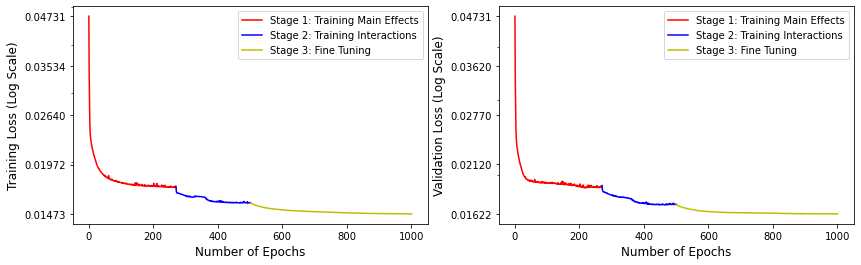

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


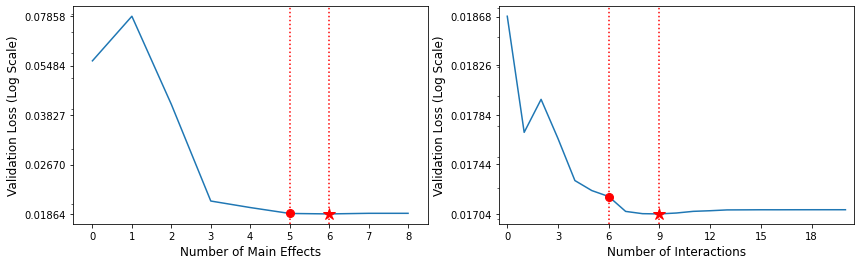

In [6]:
folder = "./results/"
if not os.path.exists(folder):
    os.makedirs(folder)

model = GAMINet(meta_info={"X" + str(i + 1):item for i, item in enumerate(meta_info.values())}, interact_num=20,
            interact_arch=[40] * 5, subnet_arch=[40] * 5, 
            batch_size=200, task_type=task_type, activation_func=tf.nn.relu, 
            main_effect_epochs=5000, interaction_epochs=5000, tuning_epochs=500, 
            lr_bp=[0.001, 0.001, 0.0001], early_stop_thres=[50, 50, 50],
            heredity=True, loss_threshold=0.01, reg_clarity=0.1,
            mono_increasing_list=[0, 1, 2, 4],
            mono_decreasing_list=[3, 5, 6, 7],
            verbose=True, val_ratio=0.2, random_state=0)
model.fit(train_x, train_y)
data_dict_logs = model.summary_logs(save_dict=False)
plot_trajectory(data_dict_logs, folder=folder, name="ch_traj", save_png=True, save_eps=True)
plot_regularization(data_dict_logs, folder=folder, name="ch_regu", save_png=True, save_eps=True)

In [7]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train),5),
                      np.round(get_metric(test_y, pred_test),5)])
print(gaminet_stat)

[0.01503 0.0156 ]


In [8]:
gaminet_stat = np.hstack([np.round(np.mean(train_y == (pred_train > 0.5)),5),
                          np.round(np.mean(test_y == (pred_test > 0.5)),5)])
print(gaminet_stat)

[0.04482 0.04118]


Global Interpretation

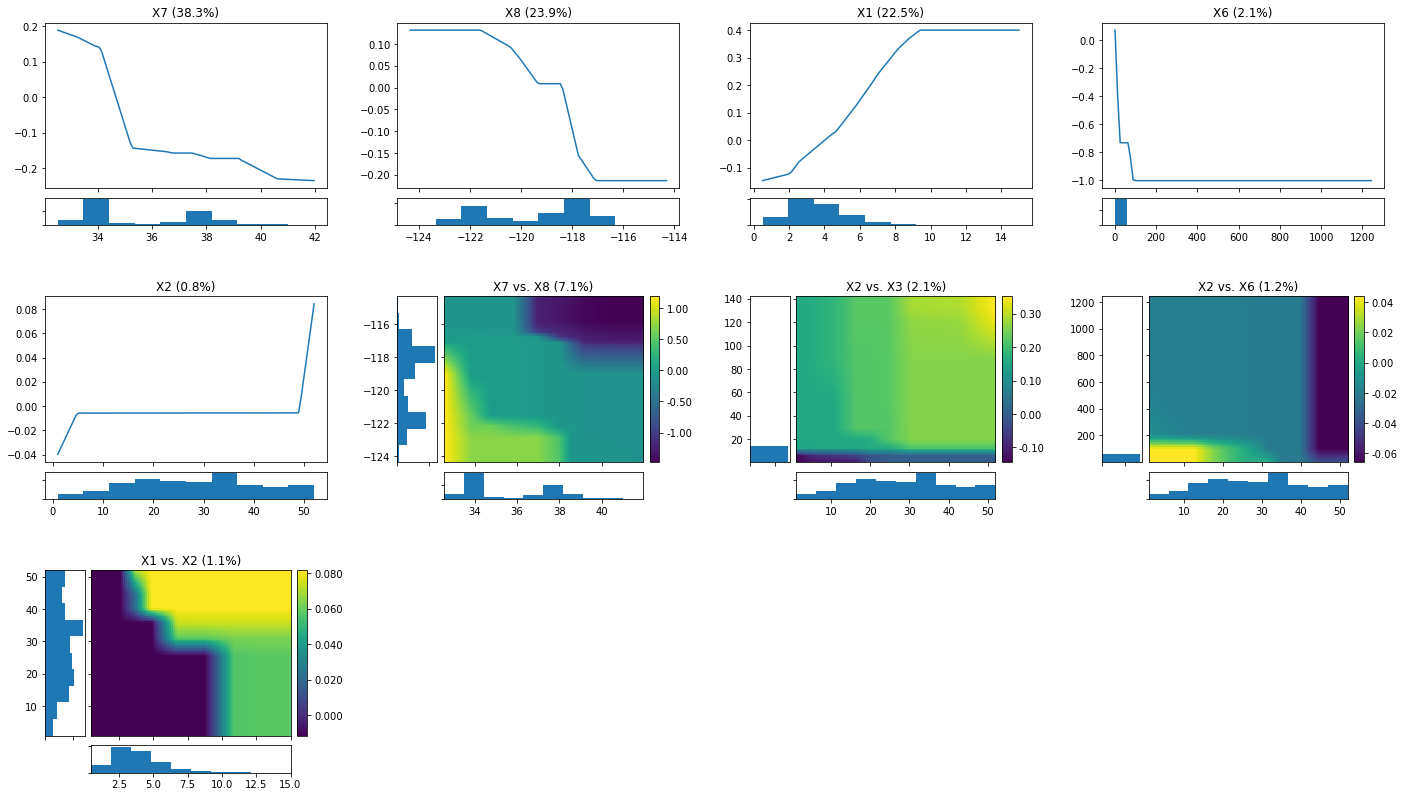

In [9]:
data_dict_global = model.global_explain(save_dict=True, folder=folder, name="ch_global")
global_visualize_density(data_dict_global, folder=folder, name="ch_global",  #11, 13, 19, 20
                         main_effect_num=8, interaction_num=4, cols_per_row=4, save_png=True, save_eps=True)

Feature Importance

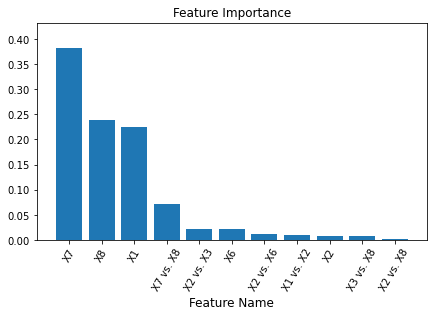

In [10]:
feature_importance_visualize(data_dict_global)

Interpret the prediction of a test sample

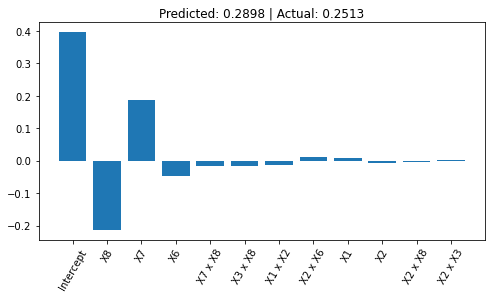

In [11]:
data_dict_local = model.local_explain(test_x[[0]], test_y[[0]], save_dict=False)
local_visualize(data_dict_local[0], save_png=False)